In [312]:
import pandas as pd
from collections import Counter
import pymorphy2

In [213]:
df = pd.read_excel('test_oscar.xlsx')

In [214]:
df.shape

(7022, 2)

In [215]:
df.head()

,normal_query,datetime
10663,пряности и страсти оскар,2019-01-27 20:43:54
12710,оскар лауреаты по годам,2019-01-29 12:26:55
14560,зеленая книга номинации на оскар 2019,2019-02-26 17:10:05
17630,призер оскара 2019,2019-02-26 17:10:40
18821,оскар 2019 победители,2019-02-26 17:11:00


In [12]:
oscar = df[df['normal_query'].str.contains("оскар")==True]

In [216]:
oscar = df

In [217]:
oscar.shape

(7022, 2)

In [218]:
import datetime

In [251]:
oscar[(oscar['datetime'] >='2019-02-23') & (oscar['datetime'] < '2019-02-24')].head()

,normal_query,datetime
247045,номинированы на оскар 2019,2019-02-23 14:32:35
535700,оскар фабрика зведз,2019-02-23 10:50:41
536872,оскар 7,2019-02-23 10:51:57
602296,оскар 2019 номинанты и победители,2019-02-23 22:13:35
892084,эллисон дженни оскар,2019-02-23 15:09:09


In [241]:
df[(df['datetime'] >'2019-02-23') & (df['datetime'] <'2019-02-25')].head()

,normal_query,datetime
187181,церемония оскар,2019-02-24 20:38:34
198682,номинации на оскар 2019,2019-02-24 20:40:18
247045,номинированы на оскар 2019,2019-02-23 14:32:35
535700,оскар фабрика зведз,2019-02-23 10:50:41
536872,оскар 7,2019-02-23 10:51:57


In [252]:
pd.to_datetime('2019-02-24').date() == oscar['datetime'].apply(lambda x: x.date())[187181]

True

In [253]:
oscar['datetime'].apply(lambda x: x.date())[187181]

datetime.date(2019, 2, 24)

In [254]:
pd.to_datetime('2019-02-24').date()

datetime.date(2019, 2, 24)

In [255]:
oscar['normal_query'][10663].split()

['пряности', 'и', 'страсти', 'оскар']

In [224]:
oscar['datetime'] = pd.to_datetime(oscar['datetime'])

In [229]:
oscar['datetime'].apply(lambda x: x.year).value_counts()

2019    7022
Name: datetime, dtype: int64

In [259]:
oscar['splitted'] = oscar['normal_query'].apply(lambda x: x.split())

In [274]:
oscar['splitted'][10663]

['пряности', 'и', 'страсти', 'оскар']

In [ ]:
morph = pymorphy2.MorphAnalyzer()

# Создадим мешок всех слов

In [340]:
bag_of_words = {}
i = 0
for row in oscar['splitted']:
    for word in row:
        if morph.parse(word)[0].normal_form not in bag_of_words:
            bag_of_words[morph.parse(word)[0].normal_form] = i
            i+= 1

In [341]:
bag_of_words

{'пряность': 0,
 'и': 1,
 'страсть': 2,
 'оскар': 3,
 'лауреат': 4,
 'по': 5,
 'год': 6,
 'зелёный': 7,
 'книга': 8,
 'номинация': 9,
 'на': 10,
 '2019': 11,
 'призёр': 12,
 'победитель': 13,
 'в': 14,
 'платье': 15,
 'счастливый': 16,
 'принц': 17,
 'уайльд': 18,
 'читать': 19,
 'ленардо': 20,
 'дикаприо': 21,
 'получить': 22,
 'серебряный': 23,
 'из': 24,
 'якутия': 25,
 'русский': 26,
 'порно': 27,
 '2018': 28,
 'часы': 29,
 'ми': 30,
 'бэнд': 31,
 '3': 32,
 'какой': 33,
 'магазин': 34,
 'модоскар': 35,
 'премия': 36,
 'потому': 37,
 'что': 38,
 'ты': 39,
 'с': 40,
 'я': 41,
 'диван': 42,
 'пьяный': 43,
 'шутить': 44,
 'про': 45,
 'пенис': 46,
 'уайлёд': 47,
 'рами': 48,
 'малёк': 49,
 'упасть': 50,
 'церемония': 51,
 'звезда': 52,
 'родиться': 53,
 'you': 54,
 'tube': 55,
 'адам': 56,
 'смит': 57,
 'де': 58,
 'ла': 59,
 'хойя': 60,
 'порнооскар': 61,
 'литературный': 62,
 'анпалог': 63,
 'список': 64,
 'шнур': 65,
 'фильм': 66,
 'большой': 67,
 'весь': 68,
 'гостиный': 69,
 'союз':

In [342]:
all_words = []
for row in oscar['splitted']:
    for word in row:
        all_words.append(morph.parse(word)[0].normal_form)

In [343]:
Counter(all_words).most_common()

[('оскар', 6737),
 ('2019', 3160),
 ('на', 874),
 ('фильм', 810),
 ('номинант', 480),
 ('премия', 418),
 ('в', 396),
 ('получить', 337),
 ('хороший', 308),
 ('и', 297),
 ('победитель', 252),
 ('смотреть', 240),
 ('2018', 239),
 ('за', 217),
 ('трансляция', 208),
 ('вручение', 180),
 ('кто', 177),
 ('список', 169),
 ('уайльд', 168),
 ('церемония', 167),
 ('год', 164),
 ('с', 154),
 ('когда', 139),
 ('порно', 132),
 ('гага', 115),
 ('быть', 105),
 ('номинация', 102),
 ('леди', 100),
 ('онлайн', 96),
 ('фото', 95),
 ('какой', 94),
 ('результат', 90),
 ('дорожка', 89),
 ('русский', 88),
 ('наряд', 83),
 ('платье', 81),
 ('рами', 80),
 ('малёк', 80),
 ('книга', 79),
 ('2017', 75),
 ('весь', 74),
 ('прямая', 72),
 ('у', 71),
 ('красный', 70),
 ('актёр', 69),
 ('из', 65),
 ('я', 63),
 ('номинировать', 63),
 ('сколько', 63),
 ('кучер', 63),
 ('не', 62),
 ('ru', 61),
 ('который', 60),
 ('по', 59),
 ('лауреат', 55),
 ('википедия', 55),
 ('купер', 54),
 ('дата', 49),
 ('для', 49),
 ('де', 48),
 (

In [344]:
words_all = []
for tup in Counter(all_words).most_common():
    if len(tup[0]) > 2:
        words_all.append(tup)
[i[0] for i in words_all][:20]

['оскар',
 '2019',
 'фильм',
 'номинант',
 'премия',
 'получить',
 'хороший',
 'победитель',
 'смотреть',
 '2018',
 'трансляция',
 'вручение',
 'кто',
 'список',
 'уайльд',
 'церемония',
 'год',
 'когда',
 'порно',
 'гага']

In [329]:
before_oscar = oscar[(oscar['datetime'] <='2019-02-23')]
before_oscar.head()

,normal_query,datetime,splitted
10663,пряности и страсти оскар,2019-01-27 20:43:54,"[пряности, и, страсти, оскар]"
12710,оскар лауреаты по годам,2019-01-29 12:26:55,"[оскар, лауреаты, по, годам]"
31613,счастливый принц оскар уайльд читать,2019-01-28 10:46:45,"[счастливый, принц, оскар, уайльд, читать]"
35816,ленардо дикаприо получил серебряного оскара из...,2019-02-01 14:24:41,"[ленардо, дикаприо, получил, серебряного, оска..."
45970,русский получил порно оскар,2019-01-31 17:47:15,"[русский, получил, порно, оскар]"


In [330]:
all_words_before = []
for row in before_oscar['splitted']:
    for word in row:
        all_words_before.append(morph.parse(word)[0].normal_form)

In [345]:
words_before = []
for tup in Counter(all_words_before).most_common():
    if len(tup[0]) > 2:
        words_before.append(tup)
[i[0] for i in words_before][:20]

['оскар',
 '2019',
 'фильм',
 'номинант',
 'получить',
 'хороший',
 'премия',
 '2018',
 'уайльд',
 'порно',
 'список',
 'год',
 'номинация',
 'когда',
 'победитель',
 'вручение',
 'смотреть',
 'кучер',
 'какой',
 '2017']

In [334]:
oscar_time = oscar[(oscar['datetime'] > '2019-02-24') & (oscar['datetime'] < '2019-02-25')]
oscar_time.head()

,normal_query,datetime,splitted
187181,церемония оскар,2019-02-24 20:38:34,"[церемония, оскар]"
198682,номинации на оскар 2019,2019-02-24 20:40:18,"[номинации, на, оскар, 2019]"
1806997,фильмы оскар 2018 список победители,2019-02-24 19:23:04,"[фильмы, оскар, 2018, список, победители]"
1810759,оскар,2019-02-24 19:23:28,[оскар]
1841110,номинанты на оскар 2019,2019-02-24 19:28:11,"[номинанты, на, оскар, 2019]"


In [336]:
all_words_now = []
for row in oscar_time['splitted']:
    for word in row:
        all_words_now.append(morph.parse(word)[0].normal_form)

In [358]:
words_now = []
for tup in Counter(all_words_now).most_common():
    if len(tup[0]) > 2:
        words_now.append(tup)
top_20_now = [i[0] for i in words_now][:20]

In [378]:
top_20_now

['оскар',
 '2019',
 'трансляция',
 'когда',
 'премия',
 'фильм',
 'номинант',
 'быть',
 'церемония',
 'уайльд',
 'хороший',
 'вручение',
 'список',
 'русский',
 'сколько',
 'получить',
 '2018',
 'прямая',
 'где',
 'смотреть']

In [360]:
dict_now = {}
i = 0
for word in top_20_now:
    dict_now[word] = i
    i += 1
dict_now

{'2018': 16,
 '2019': 1,
 'быть': 7,
 'вручение': 11,
 'где': 18,
 'когда': 3,
 'номинант': 6,
 'оскар': 0,
 'получить': 15,
 'премия': 4,
 'прямая': 17,
 'русский': 13,
 'сколько': 14,
 'смотреть': 19,
 'список': 12,
 'трансляция': 2,
 'уайльд': 9,
 'фильм': 5,
 'хороший': 10,
 'церемония': 8}

In [365]:
import scipy

In [367]:
scipy.spatial.distance.cosine([1, 1, 1, 1], [1, 0, 1, 1])

0.1339745962155613

In [376]:
scipy.spatial.distance.cosine([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

0.683772233983162

In [444]:
all_bigrams = []
for sentence in oscar['normal_query']:
    all_bigrams.append([sentence.split()[i:i+2] for i in range(len(sentence.split())-2+1)])

In [445]:
bigrams = []
for ngram in all_bigrams:
    for bigram in ngram:
        bigrams.append(morph.parse(bigram[0])[0].normal_form + ' ' + morph.parse(bigram[1])[0].normal_form)

In [446]:
bigrams

['пряность и',
 'и страсть',
 'страсть оскар',
 'оскар лауреат',
 'лауреат по',
 'по год',
 'зелёный книга',
 'книга номинация',
 'номинация на',
 'на оскар',
 'оскар 2019',
 'призёр оскар',
 'оскар 2019',
 'оскар 2019',
 '2019 победитель',
 'призёр оскар',
 'оскар 2019',
 '2019 в',
 'в платье',
 'счастливый принц',
 'принц оскар',
 'оскар уайльд',
 'уайльд читать',
 'ленардо дикаприо',
 'дикаприо получить',
 'получить серебряный',
 'серебряный оскар',
 'оскар из',
 'из якутия',
 'русский получить',
 'получить порно',
 'порно оскар',
 'оскар 2018',
 'часы ми',
 'ми бэнд',
 'бэнд 3',
 '3 в',
 'в какой',
 'какой магазин',
 'магазин в',
 'в модоскар',
 'премия оскар',
 'номинация оскар',
 'оскар 2019',
 'потому что',
 'что ты',
 'ты с',
 'с я',
 'я на',
 'на диван',
 'диван пьяный',
 'пьяный и',
 'и шутить',
 'шутить про',
 'про пенис',
 'пенис оскар',
 'оскар уайлёд',
 'оскар 2019',
 '2019 победитель',
 'рами малёк',
 'малёк упасть',
 'упасть на',
 'на оскар',
 'оскар 2019',
 'оскар 2019

In [447]:
Counter(bigrams).most_common()

[('оскар 2019', 3006),
 ('на оскар', 590),
 ('премия оскар', 393),
 ('номинант на', 249),
 ('получить оскар', 237),
 ('оскар 2018', 189),
 ('оскар уайльд', 166),
 ('2019 номинант', 150),
 ('хороший фильм', 149),
 ('оскар за', 143),
 ('оскар в', 133),
 ('2019 смотреть', 130),
 ('вручение оскар', 122),
 ('порно оскар', 117),
 ('фильм оскар', 114),
 ('леди гага', 98),
 ('за хороший', 93),
 ('кто получить', 89),
 ('фильм получить', 83),
 ('2019 победитель', 82),
 ('церемония оскар', 82),
 ('2019 список', 80),
 ('победитель оскар', 74),
 ('2019 когда', 74),
 ('рами малёк', 71),
 ('когда быть', 68),
 ('красный дорожка', 67),
 ('на русский', 67),
 ('номинировать на', 61),
 ('оскар кучер', 61),
 ('прямая трансляция', 58),
 ('церемония вручение', 58),
 ('в 2019', 57),
 ('2019 трансляция', 53),
 ('оскар и', 51),
 ('2019 кто', 51),
 ('номинация на', 49),
 ('2019 прямая', 49),
 ('ди каприо', 46),
 ('фильм номинировать', 46),
 ('вручение премия', 46),
 ('ivi ru', 45),
 ('на премия', 45),
 ('смотрет

In [448]:
all_trigrams = []
for sentence in oscar['normal_query']:
    all_trigrams.append([sentence.split()[i:i+3] for i in range(len(sentence.split())-3+1)])

In [455]:
trigrams = []
for ngram in all_trigrams:
    for trigram in ngram:
        trigrams.append(morph.parse(trigram[0])[0].normal_form + ' ' + morph.parse(trigram[1])[0].normal_form 
                        + ' ' + morph.parse(trigram[2])[0].normal_form)

In [456]:
trigrams

['пряность и страсть',
 'и страсть оскар',
 'оскар лауреат по',
 'лауреат по год',
 'зелёный книга номинация',
 'книга номинация на',
 'номинация на оскар',
 'на оскар 2019',
 'призёр оскар 2019',
 'оскар 2019 победитель',
 'призёр оскар 2019',
 'оскар 2019 в',
 '2019 в платье',
 'счастливый принц оскар',
 'принц оскар уайльд',
 'оскар уайльд читать',
 'ленардо дикаприо получить',
 'дикаприо получить серебряный',
 'получить серебряный оскар',
 'серебряный оскар из',
 'оскар из якутия',
 'русский получить порно',
 'получить порно оскар',
 'часы ми бэнд',
 'ми бэнд 3',
 'бэнд 3 в',
 '3 в какой',
 'в какой магазин',
 'какой магазин в',
 'магазин в модоскар',
 'номинация оскар 2019',
 'потому что ты',
 'что ты с',
 'ты с я',
 'с я на',
 'я на диван',
 'на диван пьяный',
 'диван пьяный и',
 'пьяный и шутить',
 'и шутить про',
 'шутить про пенис',
 'про пенис оскар',
 'пенис оскар уайлёд',
 'оскар 2019 победитель',
 'рами малёк упасть',
 'малёк упасть на',
 'упасть на оскар',
 'оскар 2019 по

In [457]:
Counter(trigrams).most_common()

[('на оскар 2019', 347),
 ('номинант на оскар', 221),
 ('премия оскар 2019', 204),
 ('оскар 2019 номинант', 150),
 ('оскар 2019 смотреть', 130),
 ('оскар за хороший', 89),
 ('оскар 2019 победитель', 82),
 ('оскар 2019 список', 80),
 ('фильм получить оскар', 76),
 ('оскар 2019 когда', 74),
 ('за хороший фильм', 66),
 ('вручение оскар 2019', 61),
 ('номинировать на оскар', 60),
 ('победитель оскар 2019', 54),
 ('оскар 2019 трансляция', 53),
 ('церемония оскар 2019', 52),
 ('2019 когда быть', 52),
 ('оскар 2019 кто', 51),
 ('оскар в 2019', 51),
 ('оскар 2019 прямая', 49),
 ('номинация на оскар', 46),
 ('фильм номинировать на', 45),
 ('вручение премия оскар', 45),
 ('на премия оскар', 44),
 ('оскар 2019 дата', 43),
 ('2019 кто получить', 43),
 ('оскар 2019 результат', 42),
 ('2019 прямая трансляция', 41),
 ('кто получить оскар', 40),
 ('получить оскар в', 39),
 ('оскар 2019 фото', 38),
 ('оскар 2019 наряд', 37),
 ('оскар де ла', 36),
 ('оскар 2019 красный', 36),
 ('2019 красный дорожка', 3

In [55]:
oscar['splitted'] = oscar['normal_query'].apply(lambda x: x.split())

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
oscar[(oscar['datetime'] >'2019-02-24') & (oscar['datetime'] <'2019-02-25')].head(10)

,normal_query,datetime,splitted
187181,церемония оскар,2019-02-24 20:38:34,"[церемония, оскар]"
198682,номинации на оскар 2019,2019-02-24 20:40:18,"[номинации, на, оскар, 2019]"
1806997,фильмы оскар 2018 список победители,2019-02-24 19:23:04,"[фильмы, оскар, 2018, список, победители]"
1810759,оскар,2019-02-24 19:23:28,[оскар]
1841110,номинанты на оскар 2019,2019-02-24 19:28:11,"[номинанты, на, оскар, 2019]"
1945580,оскар 2019,2019-02-24 16:08:16,"[оскар, 2019]"
1950436,кинопоиск номинанты на оскар,2019-02-24 16:10:50,"[кинопоиск, номинанты, на, оскар]"
2795914,оскар 2019,2019-02-24 13:46:45,"[оскар, 2019]"
2800113,анальный любящий нимфоскартер круз порно,2019-02-24 13:48:14,"[анальный, любящий, нимфоскартер, круз, порно]"
2801611,оскар 2019 когда будет трансляция,2019-02-24 13:49:29,"[оскар, 2019, когда, будет, трансляция]"


In [65]:
oscar[(oscar['datetime'] >'2019-02-25')].head(10)

,normal_query,datetime,splitted
14560,зеленая книга номинации на оскар 2019,2019-02-26 17:10:05,"[зеленая, книга, номинации, на, оскар, 2019]"
17630,призер оскара 2019,2019-02-26 17:10:40,"[призер, оскара, 2019]"
18821,оскар 2019 победители,2019-02-26 17:11:00,"[оскар, 2019, победители]"
18846,призер оскара 2019 в платье,2019-02-26 17:11:01,"[призер, оскара, 2019, в, платье]"
51962,оскар 2018,2019-02-25 15:00:57,"[оскар, 2018]"
57258,часы ми бэнд 3 в каком магазине в модоскаре,2019-02-25 15:01:11,"[часы, ми, бэнд, 3, в, каком, магазине, в, мод..."
64042,потому что ты со мной на диване пьяная и шутиш...,2019-02-25 15:02:12,"[потому, что, ты, со, мной, на, диване, пьяная..."
74997,оскар 2019 победители,2019-02-25 15:03:25,"[оскар, 2019, победители]"
80040,рами малек упал на оскаре,2019-02-25 15:03:58,"[рами, малек, упал, на, оскаре]"
82403,оскар,2019-02-25 15:04:07,[оскар]


In [69]:
oscar[(oscar['datetime'] < '2019-02-24')].head(10)

,normal_query,datetime,splitted
10663,пряности и страсти оскар,2019-01-27 20:43:54,"[пряности, и, страсти, оскар]"
12710,оскар лауреаты по годам,2019-01-29 12:26:55,"[оскар, лауреаты, по, годам]"
31613,счастливый принц оскар уайльд читать,2019-01-28 10:46:45,"[счастливый, принц, оскар, уайльд, читать]"
35816,ленардо дикаприо получил серебряного оскара из...,2019-02-01 14:24:41,"[ленардо, дикаприо, получил, серебряного, оска..."
45970,русский получил порно оскар,2019-01-31 17:47:15,"[русский, получил, порно, оскар]"
59854,премия оскар,2019-02-17 19:42:42,"[премия, оскар]"
61872,номинация оскар 2019,2019-02-17 19:43:22,"[номинация, оскар, 2019]"
94222,оскар де ла хойя,2019-02-11 17:17:07,"[оскар, де, ла, хойя]"
105972,порно оскар,2019-01-30 11:56:28,"[порно, оскар]"
112767,порнооскар 2019,2019-02-06 15:42:50,"[порнооскар, 2019]"


# Считываем данные

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [5]:
purchases = pd.read_excel('purchases.xlsx', sep='\t')

In [7]:
visits = pd.read_excel('visits.xlsx', sep='\t')

In [8]:
purchases.head(2)

,buy_ts,uid,revenue
0,23.07.2016 19:13:54,3492372810,"1,47"
1,06.11.2016 02:48:27,1564753091,"1,11"


In [9]:
visits.head(2)

,device,end_ts,source_id,start_dt,start_ts,uid
0,desktop,2016-11-30T11:04:17Z,2,2016-11-30,2016-11-30T10:53:49Z,3758486201
1,desktop,2016-11-10T23:16:57Z,4,2016-11-10,2016-11-10T23:08:04Z,2933941628


# Переводим даты в datetime

In [10]:
purchases['buy_ts_datetime'] = pd.to_datetime(purchases['buy_ts'], dayfirst=True)

visits['start_ts_datetime'] = pd.to_datetime(visits['start_ts'])

visits['end_ts_datetime'] = pd.to_datetime(visits['end_ts'])

In [11]:
visits.head(2)

,device,end_ts,source_id,start_dt,start_ts,uid,start_ts_datetime,end_ts_datetime
0,desktop,2016-11-30T11:04:17Z,2,2016-11-30,2016-11-30T10:53:49Z,3758486201,2016-11-30 10:53:49,2016-11-30 11:04:17
1,desktop,2016-11-10T23:16:57Z,4,2016-11-10,2016-11-10T23:08:04Z,2933941628,2016-11-10 23:08:04,2016-11-10 23:16:57


In [12]:
purchases.head(2)

,buy_ts,uid,revenue,buy_ts_datetime
0,23.07.2016 19:13:54,3492372810,"1,47",2016-07-23 19:13:54
1,06.11.2016 02:48:27,1564753091,"1,11",2016-11-06 02:48:27


In [13]:
visits['device'].value_counts(normalize=True)

desktop    0.731555
touch      0.268445
Name: device, dtype: float64

# Объединяем посещения с покупками

In [14]:
test_merge = pd.merge(visits, purchases, on='uid')

In [15]:
merged_df = test_merge[(test_merge['buy_ts_datetime'] >= test_merge['start_ts_datetime']) 
                       & (test_merge['buy_ts_datetime'] <= test_merge['end_ts_datetime'])]

merged_df.drop(['start_dt', 'start_ts', 'end_ts'], axis=1, inplace=True)

In [16]:
merged_df.head()

,device,source_id,uid,start_ts_datetime,end_ts_datetime,buy_ts,revenue,buy_ts_datetime
0,touch,4,3492372810,2016-07-23 19:10:57,2016-07-23 19:17:19,23.07.2016 19:13:54,"1,47",2016-07-23 19:13:54
3,desktop,1,3492372810,2017-04-18 15:17:26,2017-04-18 15:24:04,18.04.2017 15:19:31,"0,49",2017-04-18 15:19:31
4,desktop,5,1564753091,2016-11-06 02:38:06,2016-11-06 02:54:57,06.11.2016 02:48:27,"1,11",2016-11-06 02:48:27
14,desktop,3,1385616391,2017-01-31 20:14:56,2017-01-31 20:40:54,31.01.2017 20:32:42,"16,8",2017-01-31 20:32:42
25,desktop,2,1572918479,2016-12-04 01:05:13,2016-12-04 01:08:43,04.12.2016 01:05:43,"3,05",2016-12-04 01:05:43


In [17]:
merged_df.drop_duplicates(subset=['uid', 'revenue', 'buy_ts_datetime'], keep='first', inplace=True)

In [18]:
merged_df['revenue'] = merged_df['revenue'].apply(lambda x: float(x.replace(',', '.')))

In [19]:
merged_df['source_id'].value_counts(normalize=True)

4     0.239170
5     0.211395
3     0.208371
1     0.148978
2     0.136999
10    0.029531
9     0.025516
7     0.000040
Name: source_id, dtype: float64

In [20]:
merged_df['device'].value_counts(normalize=True)

desktop    0.838845
touch      0.161155
Name: device, dtype: float64

In [21]:
merged_df.groupby(['source_id'])['revenue'].median()

source_id
1     2.86
2     2.75
3     2.44
4     2.44
5     2.81
7     1.22
9     2.14
10    1.59
Name: revenue, dtype: float64

In [22]:
merged_df[merged_df['device'] == 'desktop']['source_id'].value_counts(normalize=True)

4     0.227965
5     0.222707
3     0.214362
1     0.146865
2     0.133593
10    0.028687
9     0.025774
7     0.000047
Name: source_id, dtype: float64

In [23]:
merged_df[merged_df['device'] == 'touch']['source_id'].value_counts(normalize=True)

4     0.297492
3     0.177184
1     0.159974
2     0.154729
5     0.152516
10    0.033929
9     0.024176
Name: source_id, dtype: float64

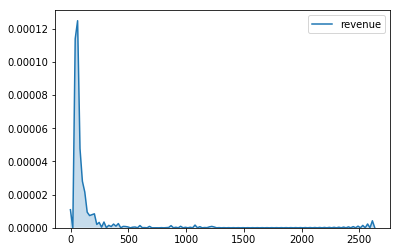

In [24]:
sns.kdeplot(merged_df['revenue'], shade=True);

# Создадим таблицы со статистикой переходов и покупок по каналам
# отдельно для desktop и touch

In [25]:
visits_desktop_source = pd.DataFrame(visits[visits['device'] == 'desktop']['source_id'].value_counts())

visits_touch_source = pd.DataFrame(visits[visits['device'] == 'touch']['source_id'].value_counts())

purchase_desktop_source = pd.DataFrame(merged_df[merged_df['device'] == 'desktop']['source_id'].value_counts())

purchase_touch_source = pd.DataFrame(merged_df[merged_df['device'] == 'touch']['source_id'].value_counts())

In [26]:
desktop_purchases_by_source = purchase_desktop_source.join(visits_desktop_source, lsuffix='_purchases', 
                                                           rsuffix='_visits', how='right').fillna(0)



In [27]:
desktop_purchases_by_source['probability_buy'] = round(desktop_purchases_by_source['source_id_purchases']
                                                       /desktop_purchases_by_source['source_id_visits'], 4)*100
desktop_purchases_by_source.sort_values(by='probability_buy',ascending=False)

,source_id_purchases,source_id_visits,probability_buy
1,9328.0,52473,17.78
5,14145.0,100550,14.07
10,1822.0,14664,12.42
2,8485.0,72062,11.77
4,14479.0,135689,10.67
3,13615.0,131451,10.36
9,1637.0,20245,8.09
7,3.0,70,4.29
6,0.0,12,0.00


In [28]:
touch_purchases_by_source = purchase_touch_source.join(visits_touch_source, lsuffix='_purchases', 
                                                       rsuffix='_visits', how='right').fillna(0)



In [29]:
touch_purchases_by_source['probability_buy'] = round(touch_purchases_by_source['source_id_purchases']
                                                       /touch_purchases_by_source['source_id_visits'], 4)*100
touch_purchases_by_source.sort_values(by='probability_buy',ascending=False)

,source_id_purchases,source_id_visits,probability_buy
1,1952.0,16526,11.81
10,414.0,5255,7.88
2,1888.0,24055,7.85
5,1861.0,33526,5.55
3,2162.0,39373,5.49
4,3630.0,68457,5.30
9,295.0,6249,4.72
7,0.0,21,0.00
6,0.0,1,0.00


In [30]:
purchases['buy_ts_datetime'].apply(lambda x: x.year).value_counts()

2016    42186
2017    33530
Name: buy_ts_datetime, dtype: int64

In [31]:
purchases['buy_ts_datetime'].apply(lambda x: x.month).value_counts()

12    9098
10    8774
11    8418
2     7855
3     7689
1     7065
5     6153
9     5336
4     4764
6     4009
7     3721
8     2834
Name: buy_ts_datetime, dtype: int64

In [32]:
purchases[purchases['buy_ts_datetime'].apply(lambda x: x.year) == 2016]['buy_ts_datetime'].apply(lambda date: date.month).value_counts()





12    9098
10    8774
11    8418
9     5336
6     4005
7     3721
8     2834
Name: buy_ts_datetime, dtype: int64

In [33]:
purchases[purchases['buy_ts_datetime'].apply(lambda x: x.year) == 2017]['buy_ts_datetime'].apply(lambda date: date.month).value_counts()





2    7855
3    7689
1    7065
5    6153
4    4764
6       4
Name: buy_ts_datetime, dtype: int64

In [34]:
visits[visits['start_ts_datetime'].apply(lambda x: x.year) == 2016]['start_ts_datetime'].apply(lambda date: date.month).value_counts()





11    88579
12    83820
10    75873
9     48328
7     35409
6     32935
8     28803
Name: start_ts_datetime, dtype: int64

In [35]:
visits[visits['start_ts_datetime'].apply(lambda x: x.year) == 2017]['start_ts_datetime'].apply(lambda date: date.month).value_counts()





2    74598
1    74137
3    71639
5    53693
4    52865
Name: start_ts_datetime, dtype: int64

In [36]:
visits['start_ts_datetime'].apply(lambda x: x.year).value_counts()

2016    393747
2017    326932
Name: start_ts_datetime, dtype: int64

In [37]:
purchases['buy_ts_datetime'].apply(lambda x: x.year).value_counts()

2016    42186
2017    33530
Name: buy_ts_datetime, dtype: int64

In [38]:
first_visit = pd.DataFrame(visits.groupby('uid')['start_ts_datetime'].min()) #Таблица с датой первого посещения

first_visit.reset_index(level=0, inplace=True)

first_visit.rename(columns={'start_ts_datetime': 'first_visit'}, inplace=True)

first_visit['first_visit'] = first_visit['first_visit'].apply(lambda x: str(x.month) + ' - ' + str(x.year))

In [39]:
first_visit.head()

,uid,first_visit
0,4245,11 - 2016
1,5097,2 - 2017
2,8896,1 - 2017
3,21017,6 - 2016
4,30696,11 - 2016


In [40]:
visits['month_year'] = visits['start_ts_datetime'].apply(lambda x: str(x.month) + ' - ' + str(x.year))

In [41]:
merged_df['month_year_visit'] = merged_df['start_ts_datetime'].apply(lambda x: str(x.month) + ' - ' + str(x.year))

merged_df['month_year_buy'] = merged_df['buy_ts_datetime'].apply(lambda x: str(x.month) + ' - ' + str(x.year))


In [42]:
merged_df[['uid', 'start_ts_datetime', 'buy_ts_datetime', 'revenue', 'month_year_visit', 'month_year_buy']].head(10)

,uid,start_ts_datetime,buy_ts_datetime,revenue,month_year_visit,month_year_buy
0,3492372810,2016-07-23 19:10:57,2016-07-23 19:13:54,1.47,7 - 2016,7 - 2016
3,3492372810,2017-04-18 15:17:26,2017-04-18 15:19:31,0.49,4 - 2017,4 - 2017
4,1564753091,2016-11-06 02:38:06,2016-11-06 02:48:27,1.11,11 - 2016,11 - 2016
14,1385616391,2017-01-31 20:14:56,2017-01-31 20:32:42,16.80,1 - 2017,1 - 2017
25,1572918479,2016-12-04 01:05:13,2016-12-04 01:05:43,3.05,12 - 2016,12 - 2016
46,1572918479,2016-12-01 20:13:47,2016-12-01 20:37:52,1.53,12 - 2016,12 - 2016
117,1572918479,2016-11-28 10:25:29,2016-11-28 10:33:08,5.25,11 - 2016,11 - 2016
128,1572918479,2016-11-28 22:51:50,2016-11-28 23:20:24,26.83,11 - 2016,11 - 2016
239,1572918479,2016-11-27 20:56:41,2016-11-27 22:10:57,5.19,11 - 2016,11 - 2016
330,1572918479,2016-11-29 20:35:10,2016-11-29 23:18:38,4.28,11 - 2016,11 - 2016


In [43]:
merged_df = pd.merge(merged_df, first_visit, on='uid')

merged_df.head()

,device,source_id,uid,start_ts_datetime,end_ts_datetime,buy_ts,revenue,buy_ts_datetime,month_year_visit,month_year_buy,first_visit
0,touch,4,3492372810,2016-07-23 19:10:57,2016-07-23 19:17:19,23.07.2016 19:13:54,1.47,2016-07-23 19:13:54,7 - 2016,7 - 2016,7 - 2016
1,desktop,1,3492372810,2017-04-18 15:17:26,2017-04-18 15:24:04,18.04.2017 15:19:31,0.49,2017-04-18 15:19:31,4 - 2017,4 - 2017,7 - 2016
2,desktop,5,1564753091,2016-11-06 02:38:06,2016-11-06 02:54:57,06.11.2016 02:48:27,1.11,2016-11-06 02:48:27,11 - 2016,11 - 2016,11 - 2016
3,desktop,3,1385616391,2017-01-31 20:14:56,2017-01-31 20:40:54,31.01.2017 20:32:42,16.80,2017-01-31 20:32:42,1 - 2017,1 - 2017,1 - 2017
4,desktop,2,1572918479,2016-12-04 01:05:13,2016-12-04 01:08:43,04.12.2016 01:05:43,3.05,2016-12-04 01:05:43,12 - 2016,12 - 2016,10 - 2016


In [44]:
uid_total_revenue = pd.DataFrame(merged_df.groupby('uid')['revenue'].sum()).reset_index() 

# сколько принес денег каждый чел

uid_total_revenue.rename(columns={'revenue': 'total_revenue'}, inplace=True)


In [45]:
merged_df = pd.merge(merged_df, uid_total_revenue, on='uid')

In [46]:
merged_df.head()

,device,source_id,uid,start_ts_datetime,end_ts_datetime,buy_ts,revenue,buy_ts_datetime,month_year_visit,month_year_buy,first_visit,total_revenue
0,touch,4,3492372810,2016-07-23 19:10:57,2016-07-23 19:17:19,23.07.2016 19:13:54,1.47,2016-07-23 19:13:54,7 - 2016,7 - 2016,7 - 2016,1.96
1,desktop,1,3492372810,2017-04-18 15:17:26,2017-04-18 15:24:04,18.04.2017 15:19:31,0.49,2017-04-18 15:19:31,4 - 2017,4 - 2017,7 - 2016,1.96
2,desktop,5,1564753091,2016-11-06 02:38:06,2016-11-06 02:54:57,06.11.2016 02:48:27,1.11,2016-11-06 02:48:27,11 - 2016,11 - 2016,11 - 2016,1.11
3,desktop,3,1385616391,2017-01-31 20:14:56,2017-01-31 20:40:54,31.01.2017 20:32:42,16.80,2017-01-31 20:32:42,1 - 2017,1 - 2017,1 - 2017,16.80
4,desktop,2,1572918479,2016-12-04 01:05:13,2016-12-04 01:08:43,04.12.2016 01:05:43,3.05,2016-12-04 01:05:43,12 - 2016,12 - 2016,10 - 2016,55.16


In [47]:
rev = merged_df[['uid', 'first_visit', 'total_revenue']].drop_duplicates(keep='first')

rev = pd.DataFrame(rev.groupby('first_visit')['total_revenue'].sum()).reset_index()

# общая сумма выручки по месяцам с момента первого захода клиента на сервис

rev

,first_visit,total_revenue
0,1 - 2017,22052.41
1,10 - 2016,40160.43
2,11 - 2016,35603.62
3,12 - 2016,39452.73
4,2 - 2017,20566.14
5,3 - 2017,19328.77
6,4 - 2017,13659.94
7,5 - 2017,15440.87
8,6 - 2016,74339.46
9,7 - 2016,27416.66


In [48]:
sum(rev['total_revenue'])

370824.0800000016

In [49]:
first_visit_cnt = pd.DataFrame(first_visit.groupby('first_visit')['uid'].nunique()).reset_index()

# кол-во зарегистрированных по месяцам (сколько в каждом месяце зарегистрировалось юзеров)

first_visit_cnt.rename(columns={'uid': 'uids_registered'}, inplace=True)

In [88]:
visits_cnt = pd.DataFrame(visits.groupby(['month_year'])['uid'].nunique()).reset_index() 

#кол-во посещений уникальных юзеров по месяцам 

visits_cnt.rename(columns={'uid': 'unique_uids_visited', 'month_year': 'first_visit'}, inplace=True)

In [89]:
final_df = pd.merge(pd.merge(visits_cnt, first_visit_cnt), rev)

In [94]:
final_df['month'] = final_df['first_visit'].apply(lambda x: int(x[:2]))

final_df['year'] = final_df['first_visit'].apply(lambda x: int(x[-4:]))

In [95]:
final_df

,first_visit,unique_uids_visited,uids_registered,total_revenue,month,year
0,1 - 2017,51277,37361,22052.41,1,2017
1,10 - 2016,52736,43906,40160.43,10,2016
2,11 - 2016,57289,44850,35603.62,11,2016
3,12 - 2016,55090,41313,39452.73,12,2016
4,2 - 2017,51085,36239,20566.14,2,2017
5,3 - 2017,48668,33234,19328.77,3,2017
6,4 - 2017,37468,25415,13659.94,4,2017
7,5 - 2017,36824,24675,15440.87,5,2017
8,6 - 2016,23926,23926,74339.46,6,2016
9,7 - 2016,25352,22779,27416.66,7,2016


In [116]:
sorted_df = pd.DataFrame(final_df.groupby(['year', 'month'])['total_revenue'].sum()).reset_index()

sorted_df['first_visit'] = sorted_df['month'].apply(lambda x: str(x)).values + ' - ' + sorted_df['year'].apply(lambda x: str(x)).values

In [129]:
sorted_df

,year,month,total_revenue,first_visit
0,2016,6,74339.46,6 - 2016
1,2016,7,27416.66,7 - 2016
2,2016,8,20694.26,8 - 2016
3,2016,9,42108.79,9 - 2016
4,2016,10,40160.43,10 - 2016
5,2016,11,35603.62,11 - 2016
6,2016,12,39452.73,12 - 2016
7,2017,1,22052.41,1 - 2017
8,2017,2,20566.14,2 - 2017
9,2017,3,19328.77,3 - 2017


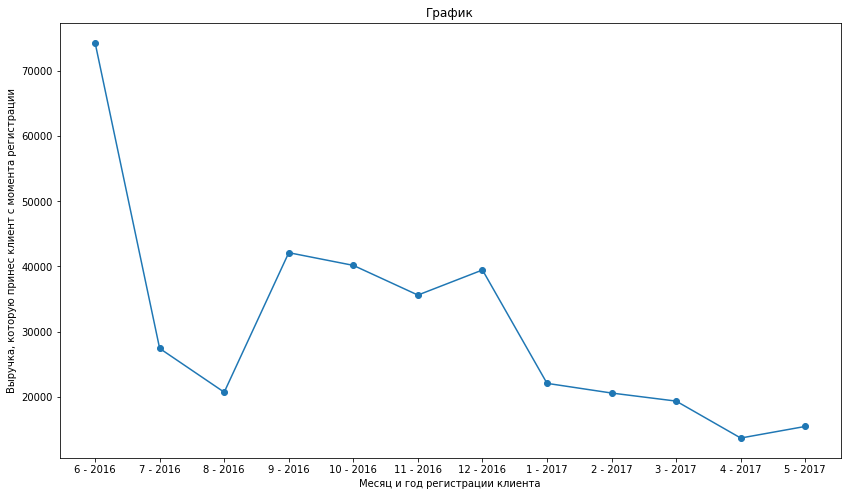

In [202]:
plt.figure(figsize=(14,8))
plt.plot(list(sorted_df['total_revenue']), marker='o')

plt.xticks(range(12), list(sorted_df['first_visit']))

plt.xlabel('Месяц и год регистрации клиента')
plt.ylabel('Выручка, которую принес клиент с момента регистрации')
plt.title('График')
plt.show()

In [173]:
final_df

,first_visit,unique_uids_visited,uids_registered,total_revenue,month,year
0,1 - 2017,51277,37361,22052.41,1,2017
1,10 - 2016,52736,43906,40160.43,10,2016
2,11 - 2016,57289,44850,35603.62,11,2016
3,12 - 2016,55090,41313,39452.73,12,2016
4,2 - 2017,51085,36239,20566.14,2,2017
5,3 - 2017,48668,33234,19328.77,3,2017
6,4 - 2017,37468,25415,13659.94,4,2017
7,5 - 2017,36824,24675,15440.87,5,2017
8,6 - 2016,23926,23926,74339.46,6,2016
9,7 - 2016,25352,22779,27416.66,7,2016


In [61]:
first_visit_cnt

,first_visit,uids_registered
0,1 - 2017,37361
1,10 - 2016,43906
2,11 - 2016,44850
3,12 - 2016,41313
4,2 - 2017,36239
5,3 - 2017,33234
6,4 - 2017,25415
7,5 - 2017,24675
8,6 - 2016,23926
9,7 - 2016,22779


In [54]:
visits[visits['uid'] == 1572918479].head()

,device,end_ts,source_id,start_dt,start_ts,uid,start_ts_datetime,end_ts_datetime,month_year
15,desktop,2016-12-09T21:47:40Z,2,2016-12-09,2016-12-09T21:42:30Z,1572918479,2016-12-09 21:42:30,2016-12-09 21:47:40,12 - 2016
3549,desktop,2016-12-04T01:08:43Z,2,2016-12-04,2016-12-04T01:05:13Z,1572918479,2016-12-04 01:05:13,2016-12-04 01:08:43,12 - 2016
30514,desktop,2016-11-08T21:43:52Z,4,2016-11-08,2016-11-08T21:15:19Z,1572918479,2016-11-08 21:15:19,2016-11-08 21:43:52,11 - 2016
30944,desktop,2016-12-01T21:24:26Z,2,2016-12-01,2016-12-01T20:13:47Z,1572918479,2016-12-01 20:13:47,2016-12-01 21:24:26,12 - 2016
35750,desktop,2016-10-22T21:10:28Z,3,2016-10-22,2016-10-22T20:59:30Z,1572918479,2016-10-22 20:59:30,2016-10-22 21:10:28,10 - 2016


In [575]:
first_visit[first_visit['uid'] == 1572918479]

,uid,first_visit
138909,1572918479,2016-10-22 20:59:30


In [569]:
merged_df.shape

(75716, 12)

In [570]:
visits.shape

(720679, 9)

In [571]:
purchases.shape

(75716, 4)

In [309]:
purchases.shape[0]/visits.shape[0]

0.10506203177836457

In [452]:
sum(purchases['revenue'].apply(lambda x: float(x.replace(',', '.'))))/pd.DataFrame(purchases['uid']).drop_duplicates(keep='first').shape[0]



6.646307488259452

In [422]:
pd.DataFrame(purchases['uid']).drop_duplicates(keep='first').shape[0]

55794

In [447]:
pd.DataFrame(visits['uid']).drop_duplicates(keep='first').shape[0]

380121

In [ ]:
767950

In [ ]:
5097

In [467]:
visits[visits['uid'] == 767950]

,device,end_ts,source_id,start_dt,start_ts,uid,start_ts_datetime,end_ts_datetime
11676,touch,2017-03-12T17:22:23Z,2,2017-03-12,2017-03-12T16:53:19Z,767950,2017-03-12 16:53:19,2017-03-12 17:22:23
67261,touch,2016-10-02T11:49:12Z,2,2016-10-02,2016-10-02T11:43:20Z,767950,2016-10-02 11:43:20,2016-10-02 11:49:12
686533,touch,2017-03-12T17:28:02Z,1,2017-03-12,2017-03-12T16:53:48Z,767950,2017-03-12 16:53:48,2017-03-12 17:28:02


In [454]:
purchases[purchases['uid'] == 3492372810]

,buy_ts,uid,revenue,buy_ts_datetime
0,23.07.2016 19:13:54,3492372810,"1,47",2016-07-23 19:13:54
66264,18.04.2017 15:19:31,3492372810,"0,49",2017-04-18 15:19:31


In [455]:
visits.shape, purchases.shape, merged_df.shape

((720679, 8), (75716, 4), (75716, 11))